# 01.Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'items_final_all.csv'), index_col = False)

In [5]:
# Check dataset

df.columns

Index(['Unnamed: 0', 'order_id', 'order_item_count', 'product_id', 'seller_id',
       'shipping_limit_date', 'item_price', 'item_shipping_cost',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_id', 'order_status',
       'timestamp_order', 'timestamp_payment_approval',
       'timestamp_order_dispatched', 'order_actual_delivery_date',
       'order_estimated_delivery_date', 'payment_method_count', 'payment_type',
       'payment_installments', 'order_amount', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_title', 'review_text',
       'survey_sent_date', 'survey_submision_date', 'order_product_item_count',
       'order_product', 'order_lead_time', 'order_da

# 02. Create new table with number of orders per day

In [6]:
# Create new table

df_sales = df.groupby(['timestamp_order']).agg({'order_id': ['nunique']})

In [7]:
df_sales.head()

,order_id
,nunique
timestamp_order,
2016-09-04 21:15:19,1
2016-09-05 00:15:34,1
2016-10-02 22:07:52,1
2016-10-03 09:44:50,1
2016-10-03 16:56:50,1


In [8]:
# Export new dataset

df_sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sales.csv'))

In [9]:
# Import data

df_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales.csv'), index_col = False)

In [10]:
# Check dataset

df_sales.head()

,Unnamed: 0,order_id
0,NaN,nunique
1,timestamp_order,NaN
2,2016-09-04 21:15:19,1
3,2016-09-05 00:15:34,1
4,2016-10-02 22:07:52,1


In [11]:
# Rename column

df_sales.rename(columns = {'Unnamed: 0' : 'timestamp_order', 'order_id' : 'order_count'}, inplace = True)

In [12]:
# Drop rows

df_sales = df_sales.drop([0, 1])

In [13]:
# Drop and reset index

df_sales = df_sales.reset_index(drop=True)

In [14]:
# Find missing values

df_sales.isnull().sum()

timestamp_order    0
order_count        0
dtype: int64

In [15]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96010 entries, 0 to 96009
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp_order  96010 non-null  object
 1   order_count      96010 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [16]:
# Change data type

df_sales['timestamp_order'] = df_sales['timestamp_order'].astype('datetime64[ns]')
df_sales['order_count'] = df_sales['order_count'].astype('int64')

In [17]:
# Create new column 

df_sales['date_order'] = df_sales['timestamp_order'].dt.date

In [18]:
df_sales

,timestamp_order,order_count,date_order
0,2016-09-04 21:15:19,1,2016-09-04
1,2016-09-05 00:15:34,1,2016-09-05
2,2016-10-02 22:07:52,1,2016-10-02
3,2016-10-03 09:44:50,1,2016-10-03
4,2016-10-03 16:56:50,1,2016-10-03
...,...,...,...
96005,2018-08-29 14:18:23,1,2018-08-29
96006,2018-08-29 14:18:28,1,2018-08-29
96007,2018-08-29 14:52:00,1,2018-08-29
96008,2018-08-29 15:00:37,1,2018-08-29


In [19]:
df_sales.to_clipboard()

In [20]:
# Create new table with product characteristics

df_sales = df_sales.groupby(['date_order']).agg({'order_count': ['sum']})

In [21]:
df_sales.head()

,order_count
,sum
date_order,
2016-09-04,1
2016-09-05,1
2016-10-02,1
2016-10-03,8
2016-10-04,59


In [22]:
# Export new dataset

df_sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sales_2.csv'))

In [23]:
# Import data

df_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales_2.csv'), index_col = False)

In [24]:
# Check dataset

df_sales.head()

,Unnamed: 0,order_count
0,NaN,sum
1,date_order,NaN
2,2016-09-04,1
3,2016-09-05,1
4,2016-10-02,1


In [25]:
# Rename column

df_sales.rename(columns = {'Unnamed: 0' : 'date_order', 'order_count' : 'num_of_orders'}, inplace = True)

In [26]:
# Drop rows

df_sales = df_sales.drop([0, 1])

In [27]:
# Drop and reset index

df_sales.reset_index(drop=True)

,date_order,num_of_orders
0,2016-09-04,1
1,2016-09-05,1
2,2016-10-02,1
3,2016-10-03,8
4,2016-10-04,59
...,...,...
610,2018-08-26,72
611,2018-08-27,64
612,2018-08-28,39
613,2018-08-29,11


In [28]:
# Export new dataset

df_sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sales_final.csv'))

In [31]:
# Import data

data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'sales_final_MA.csv'), index_col = False)

In [32]:
data.head()

,Unnamed: 0,date_order,num_of_orders,7 day MA
0,2,2016-09-04,1,NaN
1,3,2016-09-05,1,NaN
2,4,2016-10-02,1,NaN
3,5,2016-10-03,8,NaN
4,6,2016-10-04,59,NaN


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     615 non-null    int64  
 1   date_order     615 non-null    object 
 2   num_of_orders  615 non-null    int64  
 3   7 day MA       592 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 19.3+ KB


In [34]:
# Drop columns

data = data.drop(columns = ['Unnamed: 0','num_of_orders'])

In [35]:
# Change data type

data['date_order'] = data['date_order'].astype('datetime64[ns]')

In [36]:
data.head()

,date_order,7 day MA
0,2016-09-04,NaN
1,2016-09-05,NaN
2,2016-10-02,NaN
3,2016-10-03,NaN
4,2016-10-04,NaN


In [37]:
data.set_index('date_order', inplace=True)

In [38]:
data.shape

(615, 1)

In [39]:
data.columns

Index(['7 day MA'], dtype='object')

In [40]:
type(data)

pandas.core.frame.DataFrame

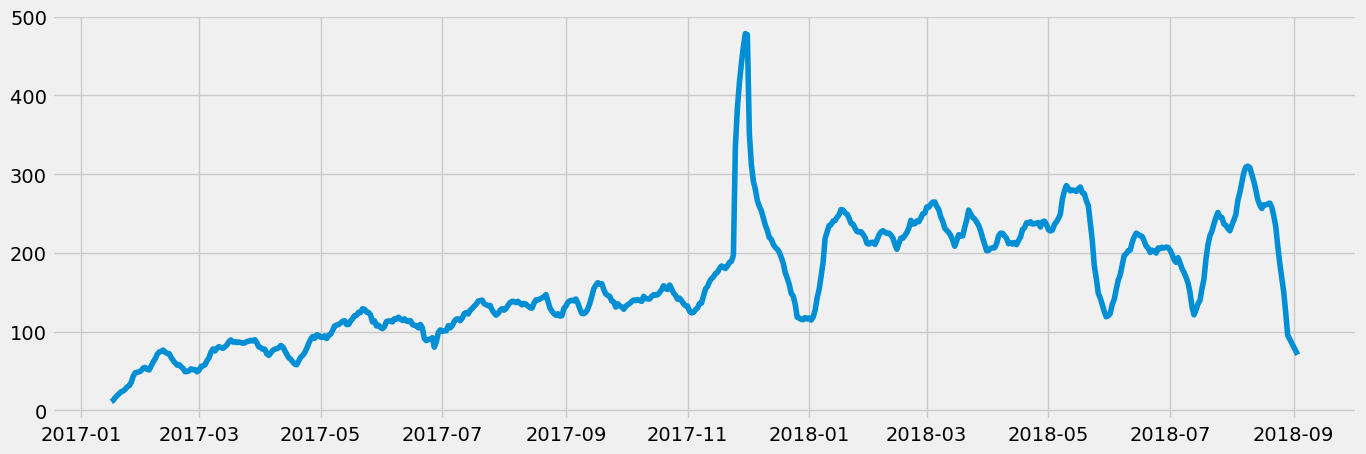

In [41]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### The sharp increase in orders coincides with Black Friday on Nov 24th. Customers are expected to have taken advantage of the discount sales which showed that orders peaked during that day

# 03. Subsetting, wrangling, and cleaning time-series data

In [42]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [43]:
data_2.tail()

,date_order,7 day MA
610,2018-08-26,169.285714
611,2018-08-27,150.571429
612,2018-08-28,124.142857
613,2018-08-29,95.571429
614,2018-09-03,70.714286


In [44]:
data_sub = data_2.loc[(data_2['date_order'] >= '2017-01-16') & (data_2['date_order'] < '2018-09-01')]

## The data only seems to be complete between January 2017 and August 2018

In [45]:
data_sub.shape

(591, 2)

In [46]:
data_sub.head()

,date_order,7 day MA
23,2017-01-16,11.000000
24,2017-01-17,12.857143
25,2017-01-18,16.428571
26,2017-01-19,19.000000
27,2017-01-20,21.285714


In [47]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date_order']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date_order'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,7 day MA
datetime,
2017-01-16,11.000000
2017-01-17,12.857143
2017-01-18,16.428571
2017-01-19,19.000000
2017-01-20,21.285714


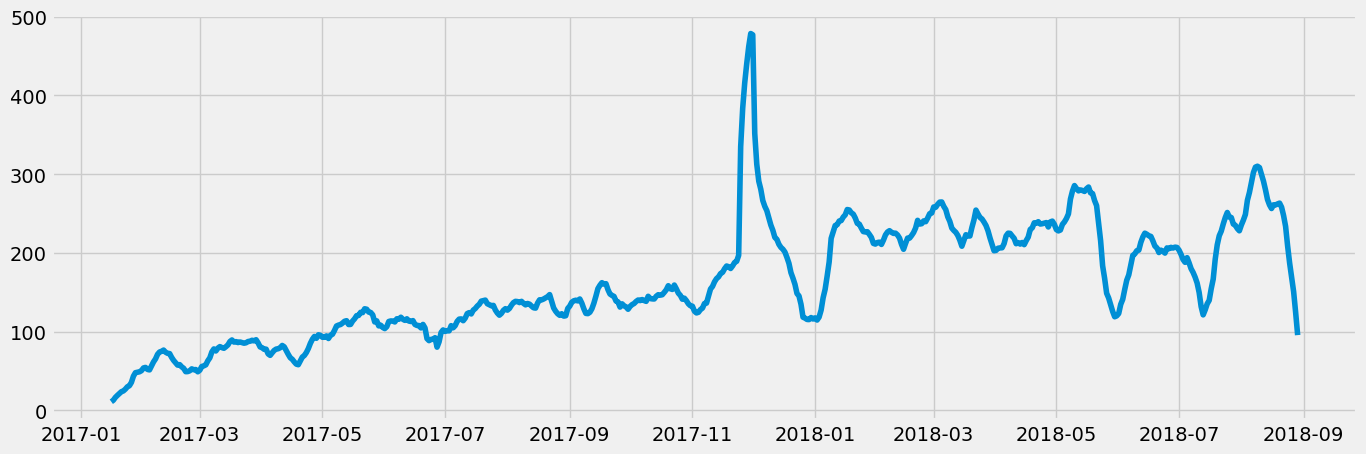

In [48]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [49]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

7 day MA    0
dtype: int64

In [50]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# There are some dups but it's from says where they have the same number of orders 

107

# 03. Time-series analysis: decomposition

In [51]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [52]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

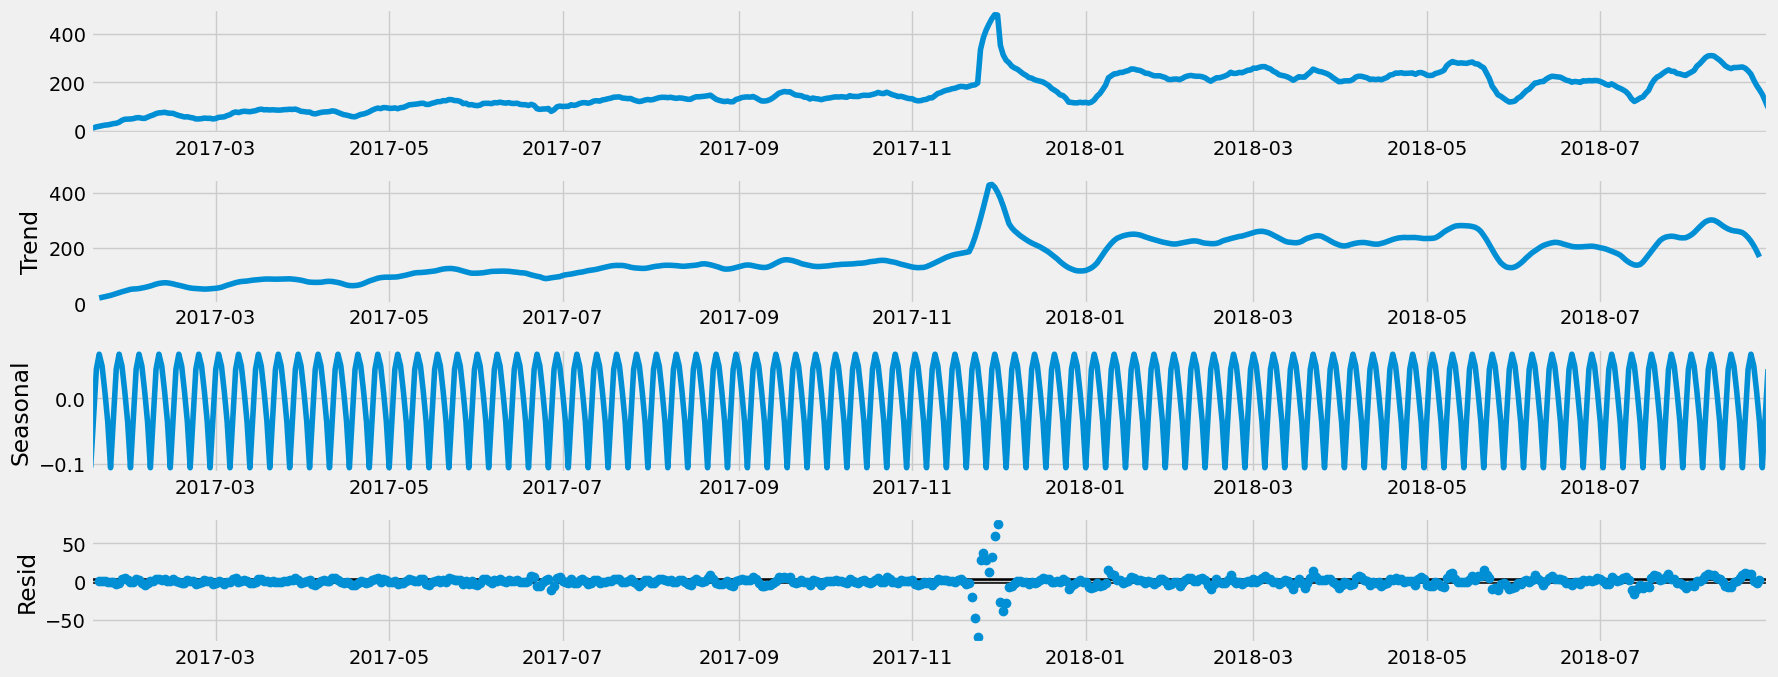

In [53]:
# Plot the separate components

decomposition.plot()
plt.show()

# 04. Testing for stationarity

In [54]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['7 day MA'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.934796
p-value                          0.041449
Number of Lags Used             15.000000
Number of Observations Used    575.000000
Critical Value (1%)             -3.441774
Critical Value (5%)             -2.866580
Critical Value (10%)            -2.569454
dtype: float64


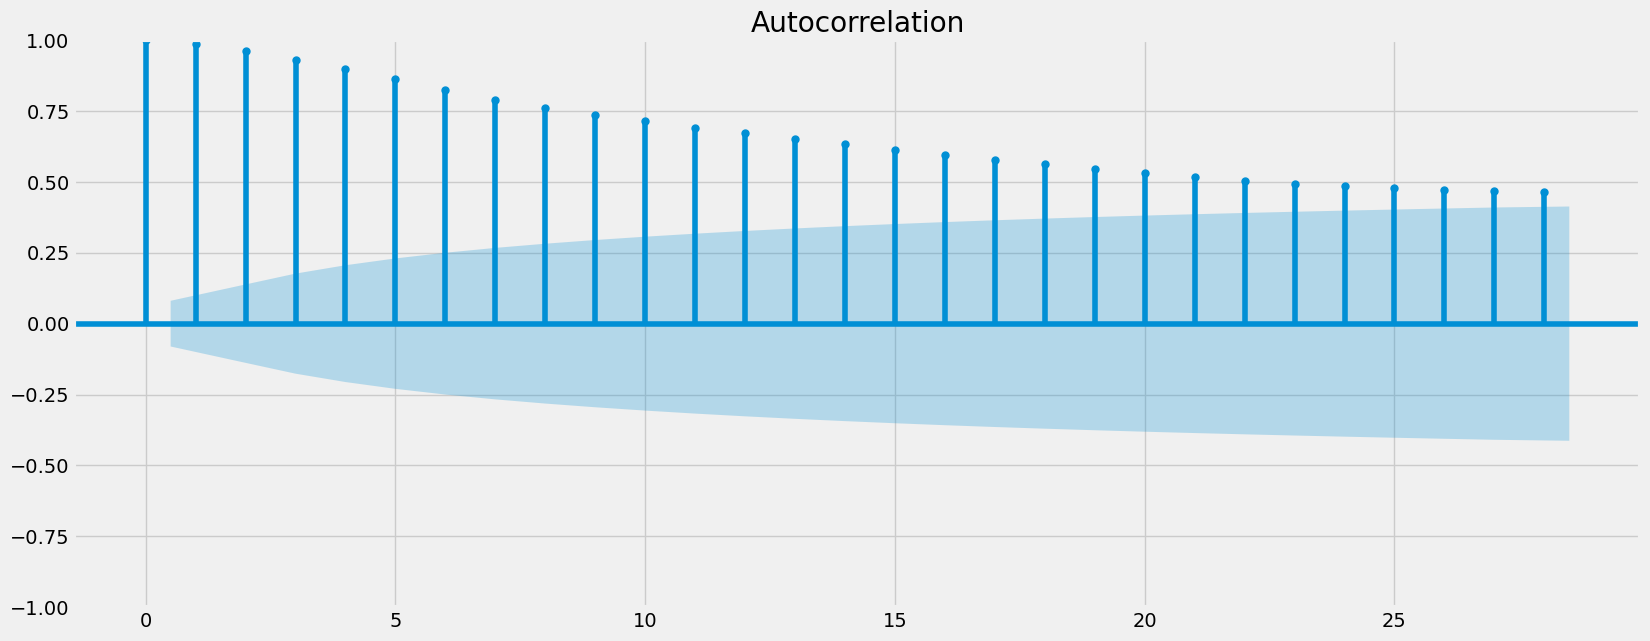

In [55]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

# 05. Stationarizing

In [56]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [57]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [58]:
data_diff.head()

,7 day MA
datetime,
2017-01-17,1.857143
2017-01-18,3.571429
2017-01-19,2.571429
2017-01-20,2.285714
2017-01-21,2.428571


In [59]:
data_diff.columns

Index(['7 day MA'], dtype='object')

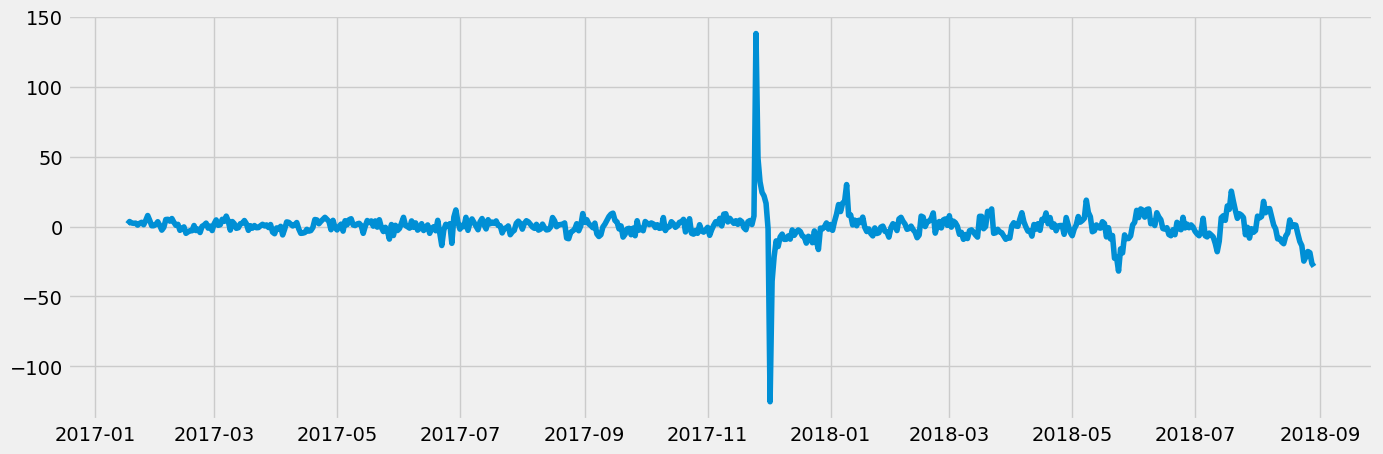

In [60]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [61]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -6.005129e+00
p-value                        1.622330e-07
Number of Lags Used            1.400000e+01
Number of Observations Used    5.750000e+02
Critical Value (1%)           -3.441774e+00
Critical Value (5%)           -2.866580e+00
Critical Value (10%)          -2.569454e+00
dtype: float64


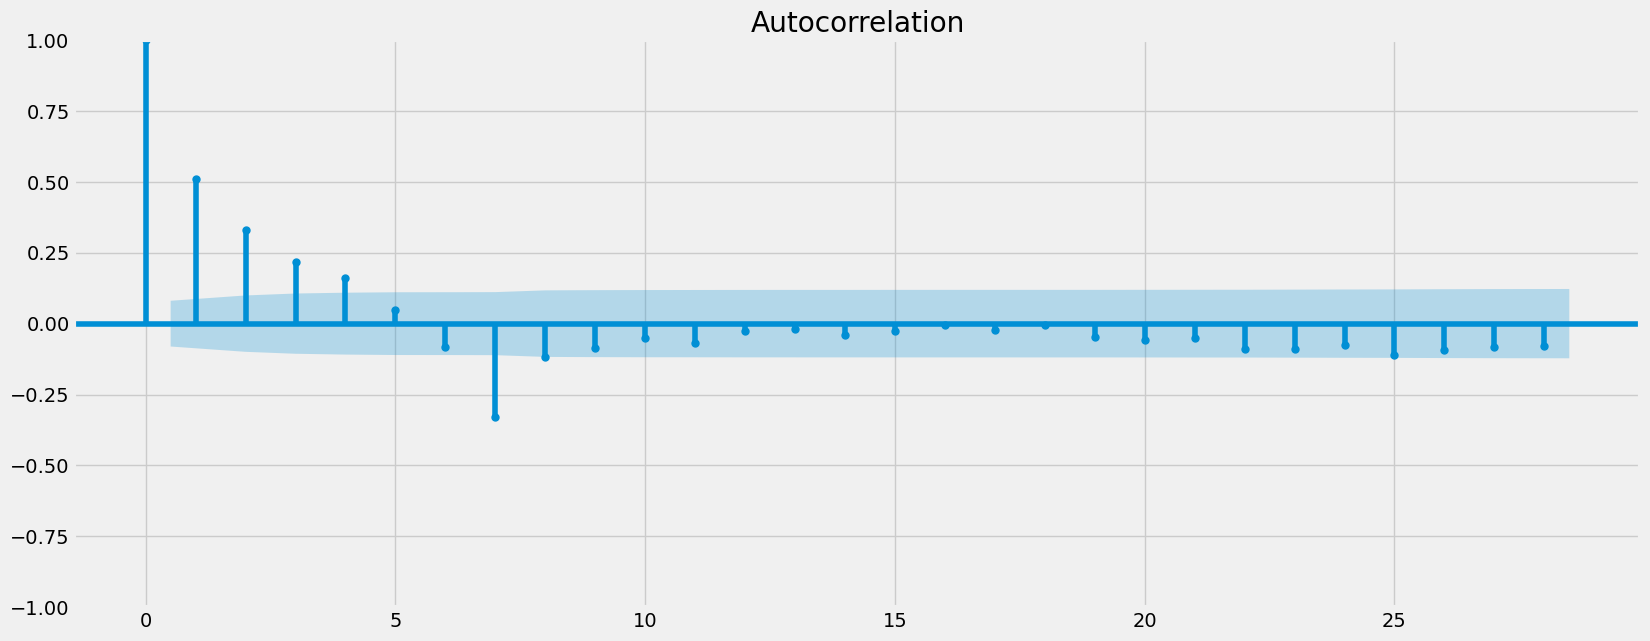

In [62]:
plot_acf(data_diff)
plt.show()